In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
import random
from tqdm.notebook import tqdm

from sklearn.metrics import accuracy_score


sns.set(style="darkgrid", font_scale=1.4)


In [18]:
SEED = 42

torch.manual_seed(SEED)

torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)


np.random.seed(SEED)


random.seed(SEED)

In [19]:
torch.backends.cudnn.deterministic = False
torch.use_deterministic_algorithms(False)

In [46]:
X, y = make_moons(n_samples=15000, noise=0.12, random_state=42)

In [47]:
X

array([[ 1.07851047, -0.35733454],
       [-0.89137033,  0.50144972],
       [ 1.84342227, -0.14774786],
       ...,
       [-0.6760705 ,  0.96805102],
       [ 0.8425521 ,  0.44303282],
       [-1.20616951,  0.00255799]])

# Построим график scatterplot для визуализации данных из датафрейма X

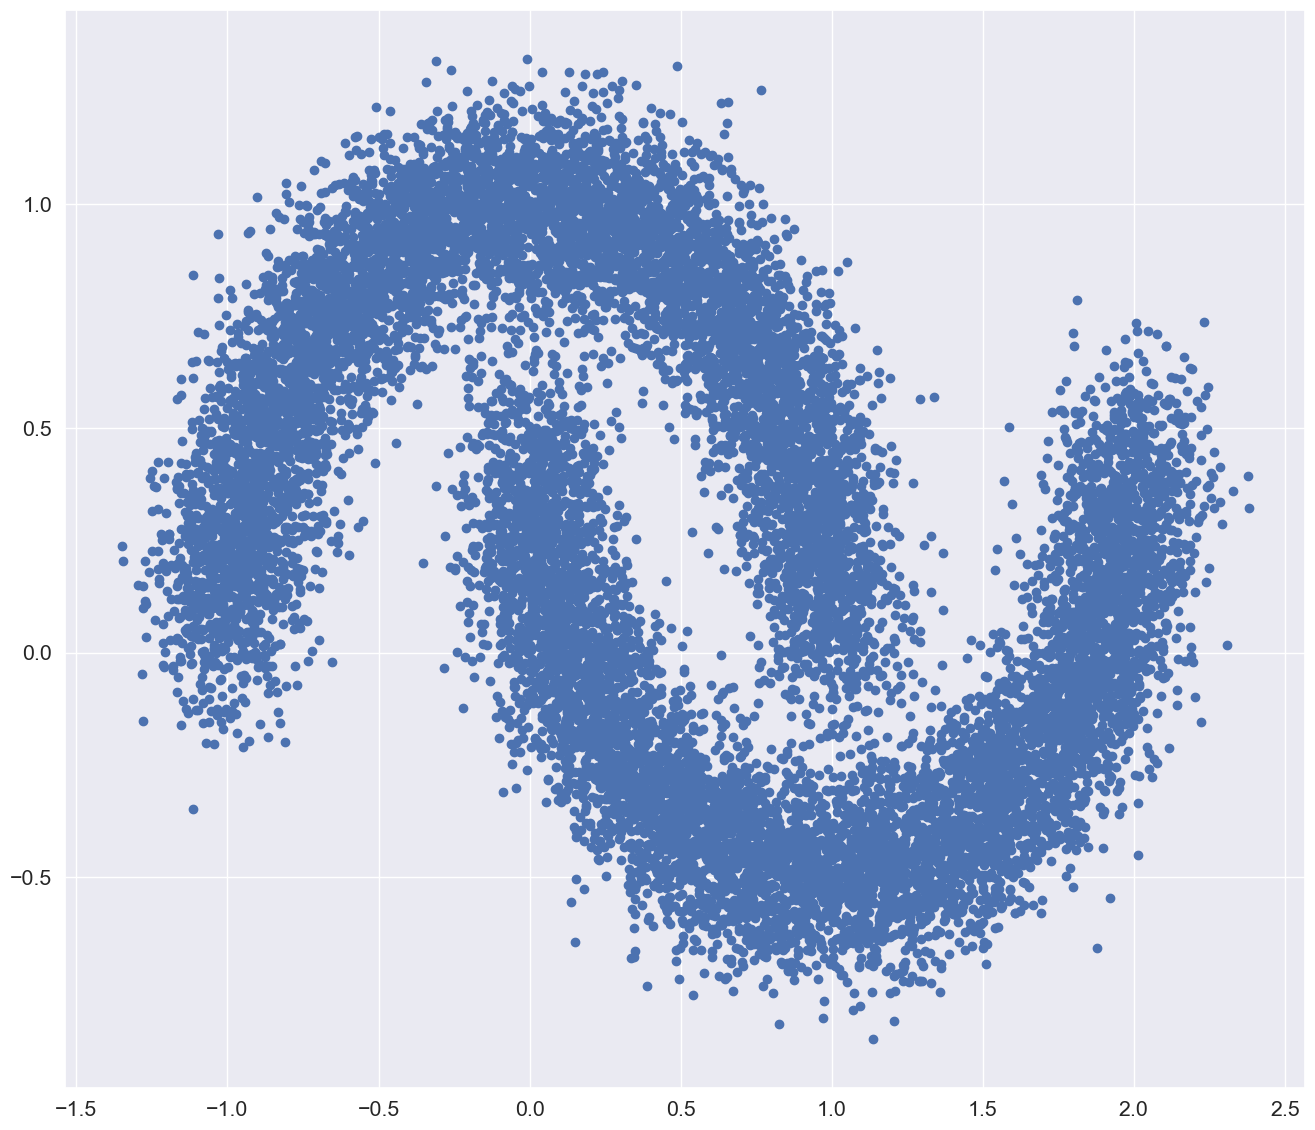

In [48]:
plt.figure(figsize=(16,14))
plt.scatter(X[:,0],X[:,1])
plt.show()

# Преобразуем данные в DataLoader

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [50]:
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

In [51]:
train_TensorDataset = TensorDataset(X_train_tensor, y_train_tensor)

test_TensorDataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_TensorDataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_TensorDataset, batch_size=128, shuffle=False)

dataloader = {"train":train_loader, "test":test_loader}


# Составим нейронную сеть

In [52]:
class Net_moon(nn.Module):
  def __init__(self):
    super(Net_moon, self).__init__()

    self.lnr1 = nn.Linear(2, 8)
    self.act1 = nn.Tanh()

    self.lnr2 = nn.Linear(8,8)
    self.act2 = nn.Tanh()

    self.lnr3 = nn.Linear(8,2)

  def forward(self, x):

    x = self.lnr1(x)
    x = self.act1(x)

    x = self.lnr2(x)
    x = self.act2(x)

    x = self.lnr3(x)

    return x

In [53]:
model = Net_moon()
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Напишем функции для обучения и валидации модели

In [54]:
def train_model(model, train_dataloaders, optimizer, loss_func):


  loss_list = []
  accuracy = 0
  number_elements = 0


  model.train()
  for X_batch, y_batch in tqdm(train_dataloaders):

    optimizer.zero_grad()
    outp = model(X_batch)
    loss = loss_func(outp, y_batch)
    loss.backward()
    optimizer.step()
    
    y_pred = torch.argmax(outp, dim=1)

    loss_list.append(loss.item())

    accuracy += sum(y_batch == y_pred).item()

    number_elements += len(X_batch)

  return accuracy/number_elements, loss_list


In [55]:
def val_model(model, test_dataloaders, optimizer, loss_func):
    

    accuracy = 0
    number_elements = 0

    model.eval()

    for X_batch, y_batch in tqdm(test_dataloaders):

        with torch.no_grad():
            outp = model(X_batch)
            y_pred = torch.argmax(outp, dim=1)
        
        accuracy += sum(y_batch == y_pred).item()

        number_elements += len(X_batch)

    return accuracy/number_elements
        


In [56]:
def general_def_train(max_epoch, model, dataloader, optimizer, loss_func):

    loss = []

    for epoch in range(max_epoch):

        accuracy_train , loss_train = train_model(model=model, train_dataloaders=dataloader["train"], optimizer=optimizer, loss_func=loss_func)

        print(accuracy_train)
        loss+=loss_train

        accuracy_test = val_model(model=model, test_dataloaders=dataloader["test"], optimizer=optimizer, loss_func=loss_func)
        print(accuracy_test)
        print("\n")

    return loss


In [57]:
max_epoch = 10

loss_list  = general_def_train(model=model, max_epoch=max_epoch, dataloader=dataloader, optimizer=optimizer, loss_func=loss)

  0%|          | 0/88 [00:00<?, ?it/s]

0.8226666666666667


  0%|          | 0/30 [00:00<?, ?it/s]

0.8925333333333333




  0%|          | 0/88 [00:00<?, ?it/s]

0.9448


  0%|          | 0/30 [00:00<?, ?it/s]

0.9842666666666666




  0%|          | 0/88 [00:00<?, ?it/s]

0.9908444444444444


  0%|          | 0/30 [00:00<?, ?it/s]

0.9973333333333333




  0%|          | 0/88 [00:00<?, ?it/s]

0.9952


  0%|          | 0/30 [00:00<?, ?it/s]

0.9976




  0%|          | 0/88 [00:00<?, ?it/s]

0.9964444444444445


  0%|          | 0/30 [00:00<?, ?it/s]

0.9981333333333333




  0%|          | 0/88 [00:00<?, ?it/s]

0.996


  0%|          | 0/30 [00:00<?, ?it/s]

0.9981333333333333




  0%|          | 0/88 [00:00<?, ?it/s]

0.996


  0%|          | 0/30 [00:00<?, ?it/s]

0.9976




  0%|          | 0/88 [00:00<?, ?it/s]

0.9962666666666666


  0%|          | 0/30 [00:00<?, ?it/s]

0.9981333333333333




  0%|          | 0/88 [00:00<?, ?it/s]

0.9956444444444444


  0%|          | 0/30 [00:00<?, ?it/s]

0.9984




  0%|          | 0/88 [00:00<?, ?it/s]

0.9954666666666667


  0%|          | 0/30 [00:00<?, ?it/s]

0.9944




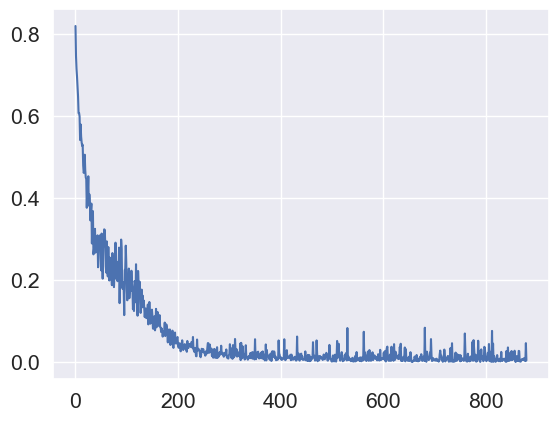

In [58]:
plt.plot(loss_list)
plt.show()